# Importing libraries

In [236]:
import pandas as pd
import numpy as np

In [237]:
import os
os.chdir("D:/Machine_Learning")

# Loading "Petrol_consumption" data

In [238]:
df = pd.read_csv("D:\Machine_Learning\petrol_consumption.csv")

In [239]:
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [240]:
df.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


* Summary:
    * The average petrol_tax is 7.6 cents and minimum of 5 and maximum of 10 cents
    * The average per capita income income is  4241(dollars) with std  3491(dollars)
    * The minimum length of paved highways is 431 miles and average is 5565 miles
    * The population_Driver_licence has a average of 0.57% 
    * The average Petrol consumption is 576.7 millions of gallons with std of 111.8 millions of gallons

In [241]:
df.columns

Index(['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)', 'Petrol_Consumption'],
      dtype='object')

check the shape of the data

In [242]:
df.shape

(48, 5)

# Divide dataset into train and test sets

In [243]:
from sklearn.model_selection import train_test_split

In [244]:
X_train, X_test, Y_train, Y_test = train_test_split(df.drop("Petrol_Consumption",axis=1),df['Petrol_Consumption'],test_size=0.2,random_state=123)

* Predictor Variables are "Petrol_tax', 'Average_income','Paved_Highways','Population_Driver_licence(%)"
* Target Variable is "Class"

In [245]:
X_train.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%)
1,9.00,4092,1250,0.572
6,8.00,5319,11868,0.451
27,7.50,3846,9061,0.579
35,6.58,3802,7834,0.629
12,7.00,4817,6930,0.574


In [246]:
Y_train.head()

1     524
6     344
27    631
35    644
12    525
Name: Petrol_Consumption, dtype: int64

# Regression using Decision Tree

Import the DecisionTreeRegressor from the sklearn.tree module

In [247]:
from sklearn.tree import DecisionTreeRegressor

Initializing an object to the DecisionTreeRegressor model

# Not passing any Hyper-Parameters to DecisionTreeRegressor model 

lets check how the model works

In [248]:
tree = DecisionTreeRegressor()  

Fit the model to the training data

In [249]:
tree.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

# Interpreting the Decision Tree Hyperparameters

* Criterion : Evaluation criteria ( default for regressor: mse (Mean-square error)
* max_depth : The maximum allowed depth of the tree (default None)
* max_Features : The maximum number of Features that are evaluated for splitting at each node (by default =None)
* max_leaf_nodes : Maximum number of leaf nodes
* min_sample_split : The minimum number of samples a node must have before it can be split(defalt:2)
* min_samples_leaf : The minimum number of samples a leaf node must have (default 1)

# Make predictions and evaluate output

In [250]:
predictions = tree.predict(X_test)

Check the top 5 predictions and actual values

In [251]:
predictions[:5]

array([782., 704., 574., 714., 414.])

In [252]:
Y_test[:5]

18    865
13    508
26    577
31    554
10    580
Name: Petrol_Consumption, dtype: int64

# we can tell that predictions are not accurate and let's evaluate the prediction accuracy

importing mean_absolute_error, r2_score from the sklearn.metrics class

In [253]:
from sklearn.metrics import mean_absolute_error, r2_score

In [254]:
mean_absolute_error(Y_test, predictions)

114.1

Mean absolute error is very high , so we can tell that this model is not good

In [255]:
r2_score(Y_test, predictions)

0.38349493744705687

* r2_score is very poor so we can say that we build a worse model it is not predicting good 
* The regression results are not accurate and performing badly

# Visualizing the tree output and try to understand the reason for poor accuracy

Importing export_graphviz from the sklearn.tree 

In [256]:
from sklearn.tree import export_graphviz

First, we export the tree output to a dot format object.

In [257]:
dot_data = export_graphviz(tree, filled=True, rounded=True, feature_names=X_train.columns,out_file=None)

* Interpreting the parameters of the export_graphviz
     * tree : decision tree
     * filled : When set to True, paint nodes to indicate majority class for classification, extremity of values for regression, or purity of node for multi-output.
     * rounded : When set to True, draw node boxes with rounded corners and use Helvetica fonts instead of Times-Roman.ounded : When set to True, draw node boxes with rounded corners and use Helvetica fonts instead of Times-Roman.
     * feature_names : Names of each of the features.
     * outfile : name of the output file. If None, the result is returned as a string.

we use graphviz to plot the dot data as a decision tree.

In [258]:
import graphviz

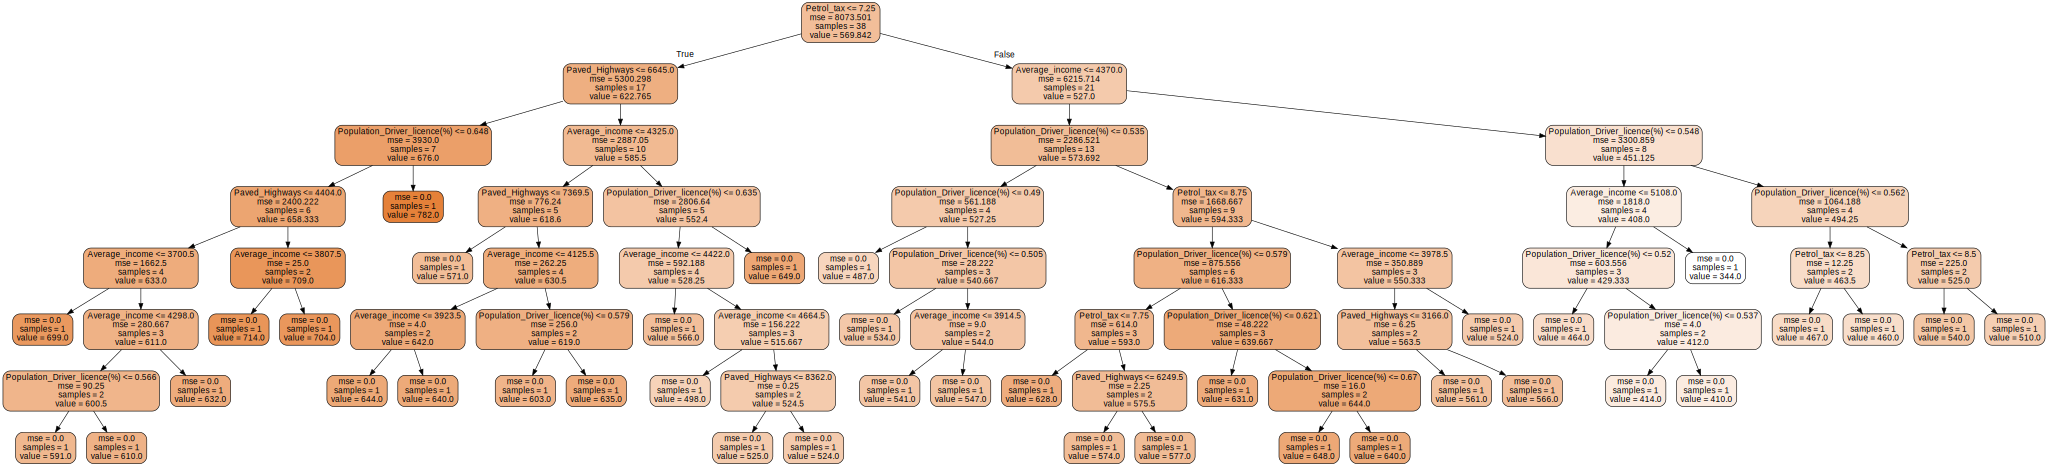

In [259]:
graphviz.Source(dot_data)

# Interpreting the decision tree 

* we did not mentioned any hyper-parameters in the decision tree so it is recursively grown 
* Splitting predictor and Cuttof point : In this decision tree, The splitting predictor is Petrol_Tax and Cutting value is 7.25 cents
* root node is Petrol_Tax
* mse : Evolution metrics for this particular region is mse=8073.501
* samples : Number of observations in this particular region is 38
* value : The value for the predictions for this region is 569.842
     * Next, the decison tree splits into 2 internal nodes Paved_Highways if Petrol_Tax <=7.25 and Average_Income if Petrol_Tax >7.25
      * Furtherly, the decison tree splits into many internal nodes and it is unstoppable bacause of not having any hyperparameters to stop the decision tree to grow from recursively
      * There are many leaf nodes in the tree where each observation belongs to one region based on the average mean or mode of the observations present in that particular region
      * The regions are formed so that the RSS is minimum

We see that on the terminal nodes (i.e. leaves) the model outputs one of the seven values for all the predictions. We can also confirm this with the below code by looking at the predicted unique values.

In [260]:
np.unique(predictions)

array([344., 414., 510., 574., 704., 714., 782.])

# Just Assignning the Hyper-parameters manually

Assigning max_depth=4 to DecisionTreeRegressor

In [261]:
tree = DecisionTreeRegressor(max_depth=4)

In [262]:
tree.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [263]:
predictions = tree.predict(X_test)

In [264]:
predictions[:5]

array([709.        , 709.        , 616.33333333, 709.        ,
       429.33333333])

In [265]:
Y_test[:5]

18    865
13    508
26    577
31    554
10    580
Name: Petrol_Consumption, dtype: int64

In [266]:
mean_absolute_error(Y_test, predictions)

138.86666666666667

Even this model also not predicting well

In [267]:
r2_score(Y_test, predictions)

0.039380136152366685

The regression results are not very accurate. Let's try to understand the reason for it by visualizing the tree output.

# Plotting the decision Tree

In [268]:
dot_data = export_graphviz(tree, filled=True, rounded=True, feature_names=X_train.columns,out_file=None)

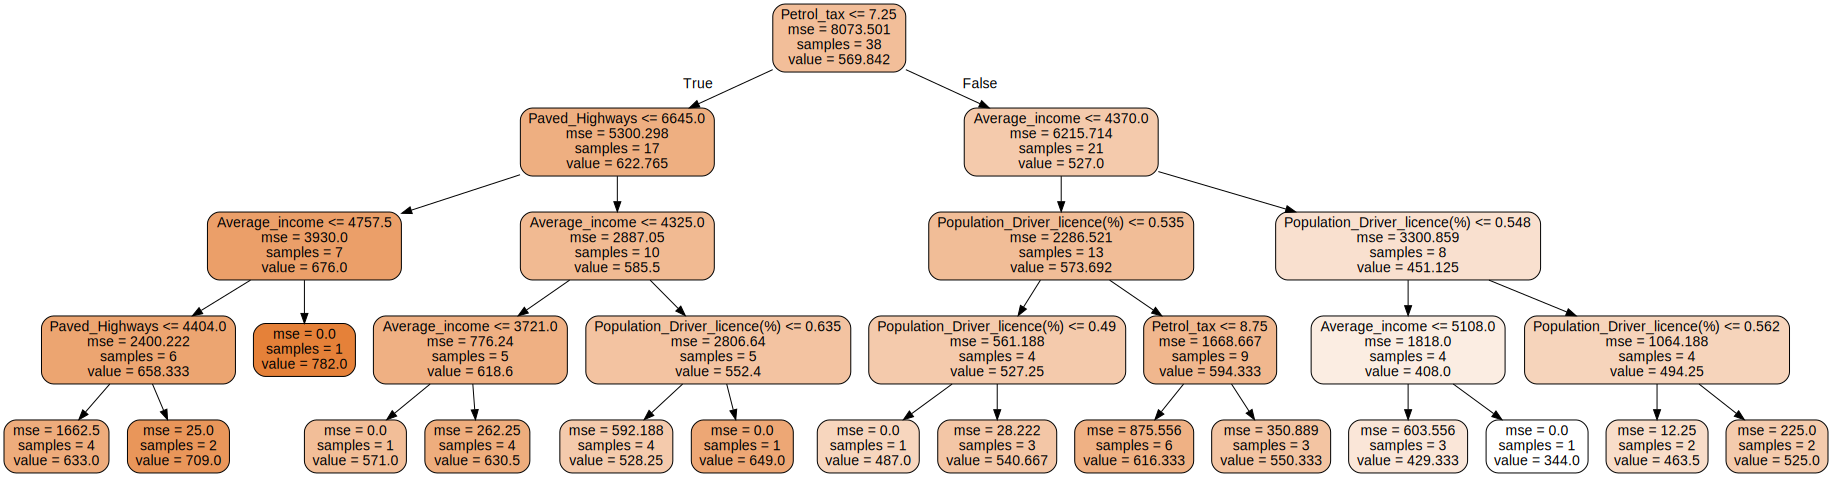

In [269]:
graphviz.Source(dot_data)

# Interpretation of Decision Tree

* After Assigning the max_depth=4, therefore 4 internal nodes are formed so the stopping criteria is max_depth=4
* similar to the previous one this decision also has splitting predictor and cuttoff value
* Every observation belongs to one of the leaf nodes showing in the above decision tree
* but this decision tree practise is also not accurate so we need the proper Hyper Parameters Tuning
* so that we can use those parameters as stopping criteria of the decision tree 

# Need of Hyper-Parameter Tuning 

# Gridsearch to find the optimal value for hyperparameters

Grid Search is one of the Hyper-perameter Tuning which the gives the proper Hyper parameters which controls the Decision Tree and also makes to perform accurately

Importing GridSearchCV from the sklearn.model_selection

In [270]:
from sklearn.model_selection import GridSearchCV

Let's use GridSearchCV to try max_depth values 2,3,4,None and 1,2,3,4 value for max_features hyperparameters. Specify 10 number of folds.

In [271]:
param_grid = [{"max_depth":[2,3,4,None], "max_features":[1,2,3,4,None]}]

Performing GridSearchCV on the DecisionTreeRegressor by assigning param_grid values and 10 number of folds

In [272]:
gs = GridSearchCV(estimator=DecisionTreeRegressor(random_state=123), param_grid=param_grid,cv=10)

Fit the training data

In [273]:
gs.fit(X_train,Y_train)

C:\Users\MANIKANTA\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=123,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'max_depth': [2, 3, 4, None],
                          'max_features': [1, 2, 3, 4, None]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             sco

# Interpreting the Parameters

* Criterion : Evaluation criteria ( default for regressor: mse (Mean-square error)
* max_depth : The maximum allowed depth of the tree (default None)
* max_Features : The maximum number of Features that are evaluated for splitting at each node (by default =None)
* max_leaf_nodes : Maximum number of leaf nodes
* min_sample_split : The minimum number of samples a node must have before it can be split(defalt:2)
* min_samples_leaf : The minimum number of samples a leaf node must have (default 1)

Print out all the hyperparameters combinations that the GridSearchCV has tried.

In [274]:
gs.cv_results_['params']

[{'max_depth': 2, 'max_features': 1},
 {'max_depth': 2, 'max_features': 2},
 {'max_depth': 2, 'max_features': 3},
 {'max_depth': 2, 'max_features': 4},
 {'max_depth': 2, 'max_features': None},
 {'max_depth': 3, 'max_features': 1},
 {'max_depth': 3, 'max_features': 2},
 {'max_depth': 3, 'max_features': 3},
 {'max_depth': 3, 'max_features': 4},
 {'max_depth': 3, 'max_features': None},
 {'max_depth': 4, 'max_features': 1},
 {'max_depth': 4, 'max_features': 2},
 {'max_depth': 4, 'max_features': 3},
 {'max_depth': 4, 'max_features': 4},
 {'max_depth': 4, 'max_features': None},
 {'max_depth': None, 'max_features': 1},
 {'max_depth': None, 'max_features': 2},
 {'max_depth': None, 'max_features': 3},
 {'max_depth': None, 'max_features': 4},
 {'max_depth': None, 'max_features': None}]

Print best hyperparameters combination.

In [275]:
gs.best_params_

{'max_depth': 2, 'max_features': 2}

print the rank for all of the tried combinations.

In [276]:
gs.cv_results_['rank_test_score']

array([ 2,  1,  5, 11, 11,  3,  4, 10, 17, 17, 14, 20,  9,  6,  6, 19, 13,
        8, 15, 15])

# Print the complete DecisionTree estimator.

In [277]:
gs.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=2,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=123, splitter='best')

# Interpreting the Decision Tree Estimator

* Criterion : Evaluation criteria ( default for regressor: mse (Mean-square error)
* max_depth : The maximum allowed depth of the tree is 2
* max_Features : The maximum number of Features that are evaluated for splitting at each node is 2
* max_leaf_nodes : Maximum number of leaf nodes is None
* min_sample_split : The minimum number of samples a node must have before it can be split is 2
* min_samples_leaf : The minimum number of samples a leaf node must have is 1

Make predictions for the test set.

In [278]:
predictions1 = gs.predict(X_test)

Check the firts 5 values of the predictions

In [279]:
predictions1[:5]

array([612.8125    , 612.8125    , 573.69230769, 612.8125    ,
       451.125     ])

In [280]:
Y_test[:5]

18    865
13    508
26    577
31    554
10    580
Name: Petrol_Consumption, dtype: int64

Calculate accuracy of prediction

In [281]:
mean_absolute_error(Y_test, predictions1)

96.76201923076923

In [282]:
r2_score(Y_test, predictions1)

0.18596482069236775

# Now we can clearly say that GridSearch improved the model accuracy and also gives the best Hyper-Parameters for the Decision Tree to control the tree and perform well

# Now Implement Hyperparameters in Decision Tree 

In [283]:
tree1 = DecisionTreeRegressor(max_depth=2,max_features=2)

In [284]:
tree1.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=2,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [285]:
predictions2 = tree1.predict(X_test)

In [286]:
predictions2[:5]

array([715.5       , 633.42857143, 563.54545455, 633.42857143,
       468.72727273])

In [287]:
Y_test[:5]

18    865
13    508
26    577
31    554
10    580
Name: Petrol_Consumption, dtype: int64

In [288]:
mean_absolute_error(Y_test, predictions2)

95.06558441558442

mean_absolute_error is reduced and model improved by using the Hyperparameters

In [289]:
r2_score(Y_test, predictions2)

0.3290531514980757

Prediction score also increases

# We can say that the model predictions are improved a lot and mean_absolute_error also reduced

# Plotting the Decision Tree

In [290]:
dot_data = export_graphviz(tree1, filled=True, feature_names=X_train.columns, out_file=None)

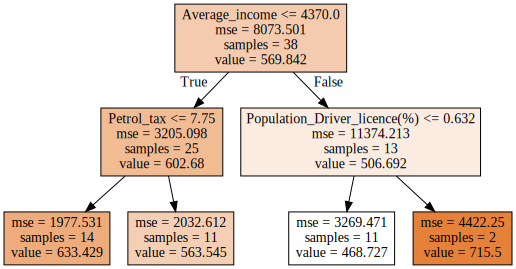

In [291]:
graphviz.Source(dot_data)

# Interpretation of Decision Tree

1) Splitting predictor and Cuttof point : In this decision tree, The splitting predictor is Petrol_Tax and Cutting value is 7.25 cents
* root node is Petrol_Tax
* mse : Evolution metrics for this particular region is mse=8073.501
* samples : Number of observations in this particular region is 38
* value : The value for the predictions for this region is 569.842

2) Next, the decison tree splits into 2 internal nodes Population_Driver_licence(%)<=0.667 if Petrol_Tax <=7.25 and Population_Driver_licennce(%)<=0.575 if Petrol_Tax >7.25
* Internal nodes are Population_Driver_licence(%)<=0.667 and Population_Driver_licennce(%)<=0.575
* mse : Evolution metrics for this particular regions are mse=5300.298 and mse=6215.714 respectively
* samples : Number of observations in this particular regions are 17 and 21 respectively
* value : The value for the predictions for this region is 622.765 and 6215 respectively

3) Furtherly, the decison tree splits into 4 internal nodes ,each observation in the dataset belongs to one of the 4 regions based on the average mean or mode value of the observations present in that particular region

4) The regions are formed so that the RSS is minimum

# Classification using Decison Tree

Loading the "bill_authentication" csv file

In [292]:
df2 = pd.read_csv("D:/Machine_Learning/bill_authentication.csv")

In [293]:
df2.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [294]:
df2.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


* Summary:
    * The average of Variance of wavelet transformed image is 0.43 and minimum of -7.04 and maximum of 6.82
    * The average Skewness of the image is 1.92 with std 5.86
    * The minimum size of Curtosis of the image is -5.28 and average is 1.39
    * The Entropy of the image has a average of -1.19 
    * The Class label has two levels 0 and 1
    

Split the data into train and test sets.

In [295]:
from sklearn.model_selection import train_test_split

we have to predict whether the Note is Authenticate or Fake

In [296]:
X_train, X_test, Y_train, Y_test = train_test_split(df2.drop("Class",axis=1),df2['Class'],test_size=0.2,random_state=123)

# Import Decision Tree Classifier

In [297]:
from sklearn.tree import DecisionTreeClassifier

Create an object for the DecisionTreeClassifier

In [298]:
tree = DecisionTreeClassifier()

fit the model to the training data.

In [299]:
tree.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

# Interpreting the Parameters

* Criterion : Evaluation criteria ( default for regressor: gini)
* max_depth : The maximum allowed depth of the tree (default None)
* max_Features : The maximum number of Features that are evaluated for splitting at each node (by default =None)
* max_leaf_nodes : Maximum number of leaf nodes
* min_sample_split : The minimum number of samples a node must have before it can be split(defalt:2)
* min_samples_leaf : The minimum number of samples a leaf node must have (default 1)

Make predictions and evaluate output.

In [300]:
predictions = tree.predict(X_test)

Check the top 5 predictions and actual values.

In [301]:
predictions[:5]

array([0, 0, 0, 0, 1], dtype=int64)

In [302]:
Y_test[:5]

657     0
18      0
700     0
221     0
1219    1
Name: Class, dtype: int64

We see that the predictions are pretty accurate. Let's evaluate the prediction accuracy.

# Importing accuracy_score and confusion_matrix

In [303]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [304]:
accuracy_score(Y_test, predictions)

0.9963636363636363

we can see that accuracy_score is very high 

In [305]:
accuracy_score(Y_test, predictions, normalize=False)

274

* Out of 275 observations , our model predicts accurately 274 observation which is good
* only one observation from test set were misclassified. Let's plot confusion matrix for this result.

# Plotting the confusion matrix 

In [306]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [307]:
confusion_mat = confusion_matrix(Y_test, predictions)
confusion_df = pd.DataFrame(confusion_mat, index=['Authenticate','Fake'], columns=['Authenticate','Fake'])

In [308]:
confusion_df

,Authenticate,Fake
Authenticate,147,0
Fake,1,127


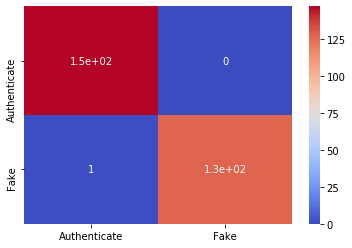

In [309]:
_=sns.heatmap(confusion_df, cmap='coolwarm', annot=True)

# Interpreting the confusion matrix

* The original number of Aunthenticate Notes are 147 and predicted number of Authenticate notes are 148 (so False positive is 1)
* The original number of Fake notes are 128 and the predicted number of Fake notes are 127 (so False Negative is 1)
* True positives are 147
* True negatives are 127

# Plotting the Decision Tree

In [310]:
from sklearn.tree import export_graphviz
import graphviz

In [311]:
dot_data = export_graphviz(tree, filled=True, rounded=True, feature_names=X_train.columns,out_file=None)

* Interpreting the parameters of the export_graphviz
     * tree : decision tree
     * filled : When set to True, paint nodes to indicate majority class for classification, extremity of values for regression, or purity of node for multi-output.
     * rounded : When set to True, draw node boxes with rounded corners and use Helvetica fonts instead of Times-Roman.ounded : When set to True, draw node boxes with rounded corners and use Helvetica fonts instead of Times-Roman.
     * feature_names : Names of each of the features.
     * outfile : name of the output file. If None, the result is returned as a string.
     

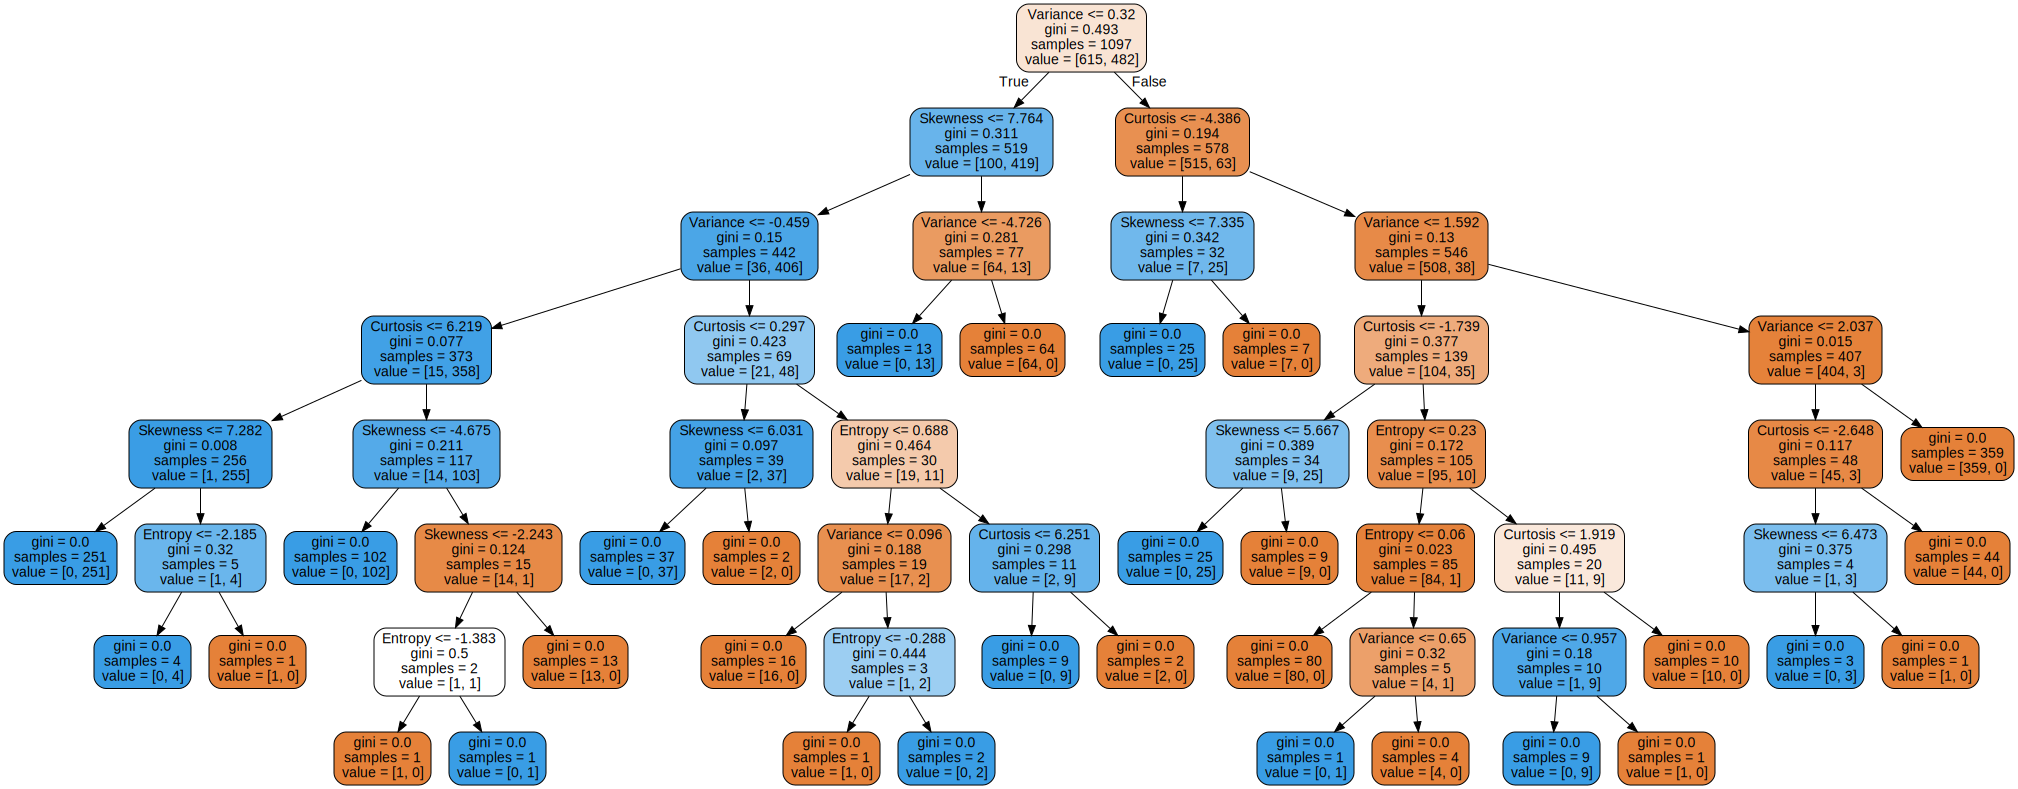

In [312]:
graphviz.Source(dot_data)

# Interpreting the Decision Tree 

* Gini Index:
     * it is also referred to as a node purity and the total variance across k classes. A small value of gini index indicated that a node predominantly contains observations from a single claa 

* we did not mentioned any hyper-parameters in the decision tree so it is recursively grown 
* Splitting predictor and Cuttof point : In this decision tree, The splitting predictor is Variance and Cutting value is 0.32 cents
* root node is Variance
* gini : Evolution metrics for this particular region is gini=0.493
* samples : Number of observations in this particular region is 1097
* value : The value for the predictions for this region is [615,482] that is 615 observations belongs to 0 class and 482 observations belongs to the 1 class
     * Next, the decison tree splits into 2 internal nodes skewness<=7.764 if Variance <=0.32 and curtosis if variance >0.32
      * Furtherly, the decison tree splits into many internal nodes and it is unstoppable bacause of not having any hyperparameters to stop the decision tree to grow from recursively
      * There are many leaf nodes in the tree where each observation belongs to one of the two classes either o or 1 class
      

# Need of Hyper-Parameter Tuning 

# Grid Search to find the optimal value for the hyperparameters

Importing GridSearchCV from sklearn.model_selection

In [313]:
from sklearn.model_selection import GridSearchCV

Let's use GridSearchCV to try max_depth values 2,3,4,None and 2,3,4 value for max_features hyperparameters. Specify 10 number of folds.

In [314]:
param_grid = [{"max_depth":[2,3,4,None], "max_features":[2,3,4,None]}]

Performing GridSearchCV on the DecisionTreeClassifier by assigning param_grid values and 10 number of folds

In [315]:
gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=123),\
                 param_grid = param_grid,\
                 cv=10)

Fit the training data

In [316]:
gs.fit(X_train, Y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=123,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'max_depth': [2, 3, 4, None],
                          'max_features': [2, 3, 4, None]}],
             pre_di

Print out all the hyperparameters combinations that the GridSearchCV has tried.

In [317]:
gs.cv_results_['params']

[{'max_depth': 2, 'max_features': 2},
 {'max_depth': 2, 'max_features': 3},
 {'max_depth': 2, 'max_features': 4},
 {'max_depth': 2, 'max_features': None},
 {'max_depth': 3, 'max_features': 2},
 {'max_depth': 3, 'max_features': 3},
 {'max_depth': 3, 'max_features': 4},
 {'max_depth': 3, 'max_features': None},
 {'max_depth': 4, 'max_features': 2},
 {'max_depth': 4, 'max_features': 3},
 {'max_depth': 4, 'max_features': 4},
 {'max_depth': 4, 'max_features': None},
 {'max_depth': None, 'max_features': 2},
 {'max_depth': None, 'max_features': 3},
 {'max_depth': None, 'max_features': 4},
 {'max_depth': None, 'max_features': None}]

Print best hyperparameters combination.

In [318]:
gs.best_params_

{'max_depth': None, 'max_features': 2}

print the rank for all of the tried combinations.

In [319]:
gs.cv_results_['rank_test_score']

array([16, 13, 13, 13, 12,  9,  9,  9,  7,  8,  5,  5,  1,  4,  1,  1])

Print the complete DecisionTree estimator.

In [320]:
gs.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

# Interpreting the GridSearch estimator

* Criterion : Evaluation criteria ( default for classifier: gini)
* max_depth : The maximum allowed depth of the tree is None
* max_Features : The maximum number of Features that are evaluated for splitting at each node is 2
* max_leaf_nodes : Maximum number of leaf nodes is None
* min_sample_split : The minimum number of samples a node must have before it can be split is 2
* min_samples_leaf : The minimum number of samples a leaf node must have is 1

Make predictions for the test set.

In [321]:
predictions = gs.predict(X_test)

Calculate accuracy of prediction

In [322]:
accuracy_score(Y_test, predictions)

0.9890909090909091

accuracy_score is good

In [323]:
accuracy_score(Y_test, predictions, normalize=False)

272

# Plotting the confusion matrix

In [324]:
confusion_mat = confusion_matrix(Y_test, predictions)
confusion_df = pd.DataFrame(confusion_mat, index=['Authenticate','Fake'], columns=['Authenticate','Fake'])

In [325]:
confusion_df

,Authenticate,Fake
Authenticate,146,1
Fake,2,126


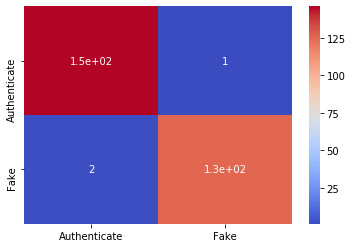

In [326]:
_=sns.heatmap(confusion_df, cmap='coolwarm', annot=True)

* The original number of Aunthenticate Notes are 147 and predicted number of Authenticate notes are 148 (so False positive is 1)
* The original number of Fake notes are 128 and the predicted number of Fake notes are 127 (so False Negative is 1)
* True positives are 147
* True negatives are 127

# Implement the hyperparameters in decision tree

set the hyperparameters as given by the gridsearch the best hyperparameters estimator

In [327]:
tree2 = DecisionTreeClassifier(max_depth=None, max_features=2)

fit the model

In [328]:
tree2.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

# Interpreting the parameters

* Criterion : Evaluation criteria ( default for classifier: gini)
* max_depth : The maximum allowed depth of the tree is None
* max_Features : The maximum number of Features that are evaluated for splitting at each node is 2
* max_leaf_nodes : Maximum number of leaf nodes is None
* min_sample_split : The minimum number of samples a node must have before it can be split is 2
* min_samples_leaf : The minimum number of samples a leaf node must have is 1

Make predictions and evaluate output.



In [329]:
predictions2 = tree2.predict(X_test)

Check the top 5 predictions and actual values.

In [330]:
predictions2[:5]

array([0, 0, 0, 0, 1], dtype=int64)

In [331]:
Y_test[:5]

657     0
18      0
700     0
221     0
1219    1
Name: Class, dtype: int64

We see that the predictions are pretty accurate. Let's evaluate the prediction accuracy.

In [332]:
accuracy_score(Y_test, predictions2)

0.9890909090909091

Accuracy_score is improved by using the hyperparameters given by the gridsearch best estimators

In [333]:
accuracy_score(Y_test, predictions2, normalize=False)

272

Out of 275 test data 274 values are predicted accuratelty, model prediction is very high and accuracy is improved

# Plotting the confusion matrix


In [334]:
confusion_mat = confusion_matrix(Y_test, predictions2)
confusion_df = pd.DataFrame(confusion_mat, index=['Authenticate','Fake'], columns=['Authenticate','Fake'])

In [335]:
confusion_df

,Authenticate,Fake
Authenticate,146,1
Fake,2,126


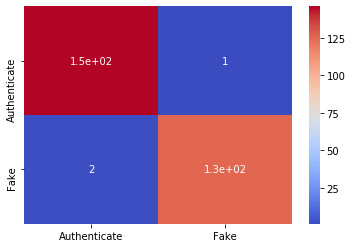

In [336]:
_=sns.heatmap(confusion_df, cmap='coolwarm', annot=True)

# Interpreting the Confusion matrix 

* The original number of Aunthenticate Notes are 147 and predicted number of Authenticate notes are 148 (so False positive is 1)
* The original number of Fake notes are 128 and the predicted number of Fake notes are 127 (so False Negative is 1)
* True positives are 147
* True negatives are 127
* Recall is improved

# Plotting the decision tree

In [337]:
dot_data = export_graphviz(tree2, filled=True, rounded=True, feature_names=X_train.columns, out_file=None)

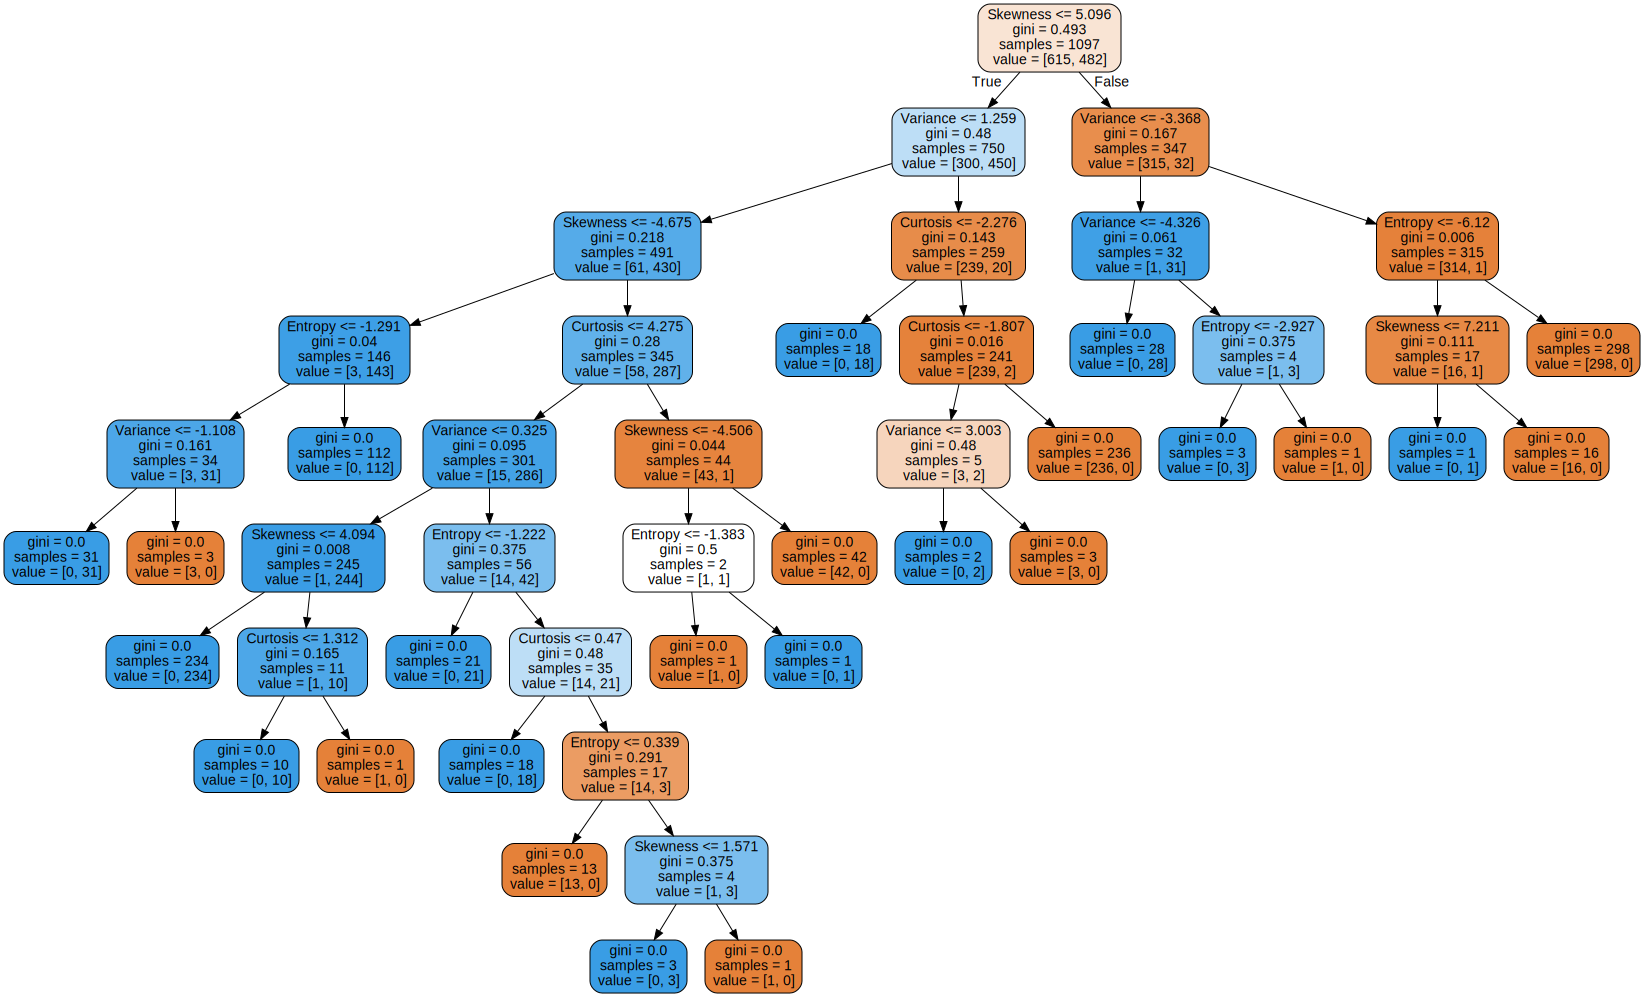

In [338]:
graphviz.Source(dot_data)

# Interpreting the Decision Tree

1) Splitting predictor and Cuttof point : In this decision tree, The splitting predictor is Skewness and Cutting value is 5.096

* root node is Skewness
* gini : Evolution metrics for this particular region is 0.493
* samples : Number of observations in this particular region is 1097
* value : The value for the predictions for this region is [615,482] that is 615 observations belongs to 0 class and 482 observations belongs to 1 class

2) Next, the decison tree splits into 2 internal nodes Variance<=1.259 if Skewness<=5.096 and Variance<=-3.369 if Skewness >5.096
* Internal nodes are Variance<=1.259 and Variance<=-3.369
* gini : Evolution metrics for this particular regions are gini=0.48 and gini=0.168 respectively
* samples : Number of observations in this particular regions are 750 and 347 respectively
* value : The value for the predictions for this region is [300,450] and [315,32] respectively

3) Furtherly, the decison tree splits into many internal nodes

4) many leaf nodes are formed and each observation in the dataset belongs to one of the 2 classes either class 0 (Autheticated note) or class 1 (Fake note) 
* as shown in the decision tree , In the leaf nodes the numbe rof observations belongs to each class is shown

# So, thus the DecissionTreeClassifier model Accuracy is improved by using the Hyperparameters given by the GridSearch